> In order to build our forecasting model, we will have to opt for using CRISP-DM methodology.

**1. Business understanding**

This first step is essentially about understanding the business, the need for the specific project and the resources that we have. 

1.1 **Gather background information**

 *Compiling the business background *

this project is about historical weather around Szeged, Hungary , from 2006 to 2016

**Defining business objectives**

Make data more accessible and understandable for everyone.

Provide fast analytics for the different Factors Affecting Weather .

use different prediction and classification algorithms

calculating and comparing evaluation measures



**1.2 Assessing the situation**

** Resource Inventory **

Data : dataset contains in a practical format 10 years (2006-2016) of hourly data in just a single file.

Computing resources : hp , i3 processor, 4 GB RAM

Programming languages and libraries : python ( Numpy, pandas, matplotlib, seaborn, tensorflow, scikitlearn)

**1.3 Objective of the project**

 the objective of this project is to analyze the weather data and extract the hypotheses to arrive at a prediction

**2.Collect initial data**

Dataset from Kaggle : https://www.kaggle.com/budincsevity/szeged-weather

**2.1 Data Exploration**

Exploration is to understand how all these columns are related and the value structures so the correlation between these data

**importing libraries **

In [5]:
#Data manipulation libraries : 
import numpy as np  #numpy
import pandas as pd  #pandas

#System libraries
import glob 


#Plotting
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#math operations lib 
import math
from math import pi

#date manipulation 
import datetime as dt







#Splitting data to test and train 
from sklearn.model_selection import train_test_split

import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

%matplotlib inline
plt.style.use('seaborn-whitegrid')

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from collections import Counter
import time
import datetime as dt
from datetime import datetime
import collections
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib.pyplot import rcParams

from sklearn import linear_model

**Check out the data**

In [6]:
data = pd.read_csv("C:/Users/sa/Downloads/weatherHistory.csv")
data.head() 

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [7]:
# check datatypes
data.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [8]:
#Categorical variables:
categorical = data.select_dtypes(include = ["object"]).keys()
print(categorical)

Index(['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary'], dtype='object')


In [9]:
#Quantitative variables:
quantitative = data.select_dtypes(include = ["int64","float64"]).keys()
print(quantitative)

Index(['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Loud Cover', 'Pressure (millibars)'],
      dtype='object')


In [11]:
#'Formatted Date' transformation:

data['Date'] = pd.to_datetime(data['Formatted Date'])
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day
data['hour'] = data['Date'].dt.hour
data.head()

AttributeError: Can only use .dt accessor with datetimelike values

In [12]:
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Date
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006-04-01 00:00:00+02:00
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006-04-01 01:00:00+02:00
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01 02:00:00+02:00
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01 03:00:00+02:00
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01 04:00:00+02:00


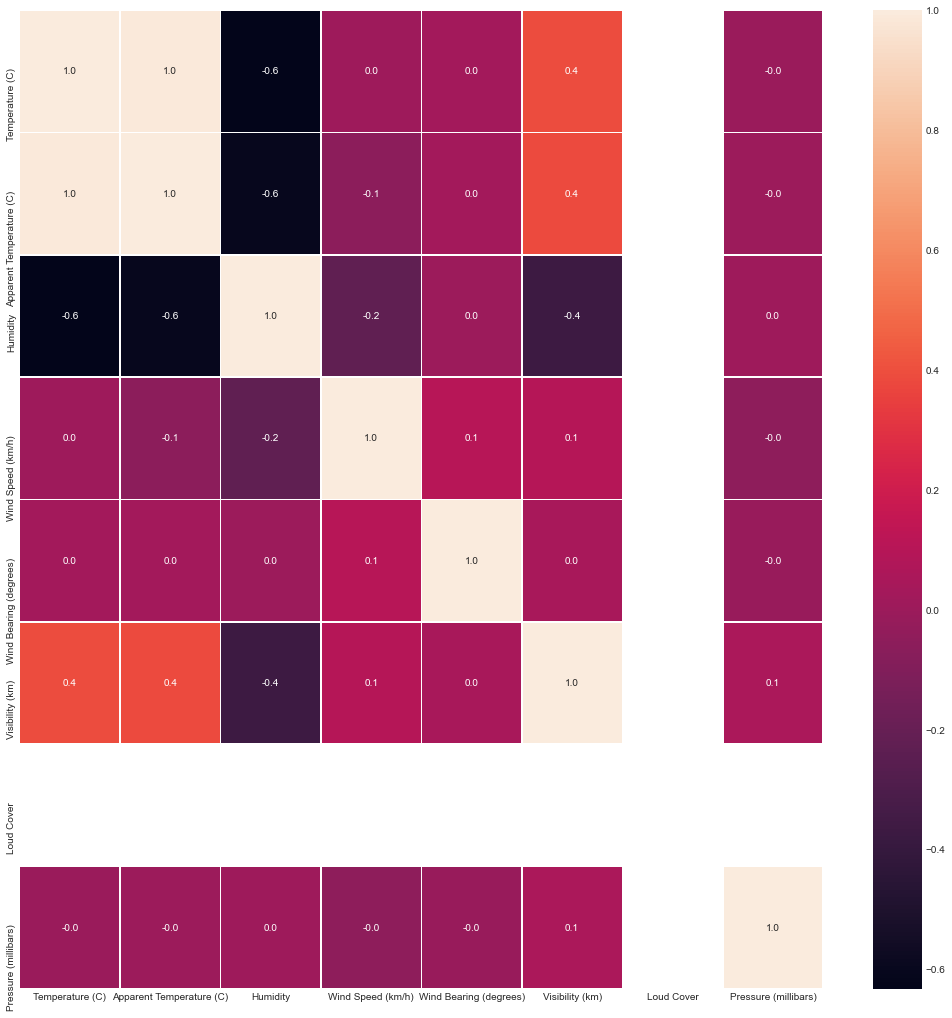

In [13]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

**Quantitative variables. Missing values**

In [9]:
data[quantitative].describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


array([[<AxesSubplot:title={'center':'Temperature (C)'}>,
        <AxesSubplot:title={'center':'Apparent Temperature (C)'}>,
        <AxesSubplot:title={'center':'Humidity'}>],
       [<AxesSubplot:title={'center':'Wind Speed (km/h)'}>,
        <AxesSubplot:title={'center':'Wind Bearing (degrees)'}>,
        <AxesSubplot:title={'center':'Visibility (km)'}>],
       [<AxesSubplot:title={'center':'Loud Cover'}>,
        <AxesSubplot:title={'center':'Pressure (millibars)'}>,
        <AxesSubplot:>]], dtype=object)

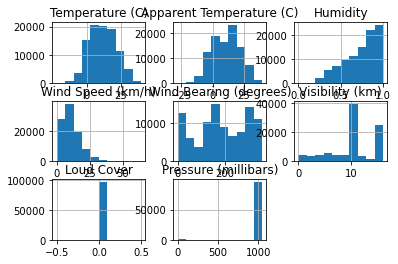

In [12]:

data[quantitative].hist()

'Loud Cover' takes values zero. We drop it

In [13]:
data=data.drop('Loud Cover',axis=1)

"Pressure (millibars)".

Some observations are nil. It seems that they lack values. because the pressure does not take zero as value 

Let's fill the zeros with the median:

<AxesSubplot:>

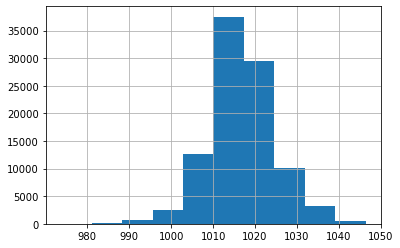

In [15]:
pressure_median = data['Pressure (millibars)'].median()
      
def pressure(x):
    if x==0:
        return x + pressure_median
    else:
        return x
        
data["Pressure (millibars)"] = data.apply(lambda row:pressure(row["Pressure (millibars)"]) , axis = 1)


data['Pressure (millibars)'].hist()


** Categorical variables**

<AxesSubplot:xlabel='count', ylabel='Summary'>

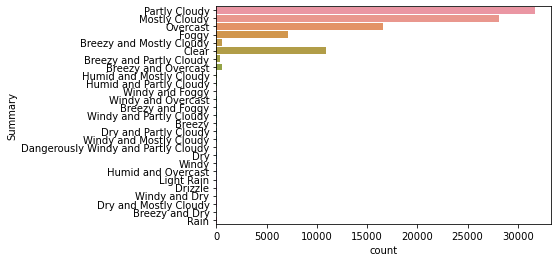

In [16]:

sns.countplot(y=data['Summary'])

In [17]:
data['Daily Summary'].value_counts(dropna=False)

Mostly cloudy throughout the day.                                                                                           20085
Partly cloudy throughout the day.                                                                                            9981
Partly cloudy until night.                                                                                                   6169
Partly cloudy starting in the morning.                                                                                       5184
Foggy in the morning.                                                                                                        4201
                                                                                                                            ...  
Partly cloudy starting overnight continuing until morning and breezy starting in the morning continuing until afternoon.       24
Breezy starting overnight continuing until morning and foggy in the evening.              

In [18]:
data['Summary'].value_counts(dropna=False)

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Windy and Mostly Cloudy                   35
Breezy and Foggy                          35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [19]:
data['Precip Type'].value_counts(dropna=False)

rain    85224
snow    10712
NaN       517
Name: Precip Type, dtype: int64

In [21]:
data.fillna(method='ffill', inplace=True)

<AxesSubplot:xlabel='Precip Type', ylabel='count'>

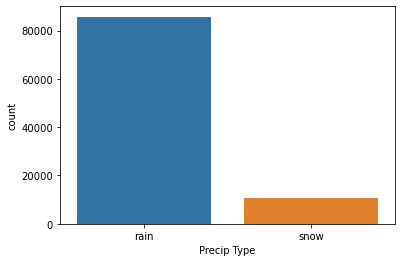

In [22]:
sns.countplot(x=data['Precip Type'])

In [23]:

# Calculate total number of cells in dataframe
totalCells = np.product(data.shape)

# Count number of missing values per column
missingCount = data.isnull().sum()

# Calculate total number of missing values
totalMissing = missingCount.sum()

# Calculate percentage of missing values
print("The weather history dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

The weather history dataset contains 0.0 % missing values.


<Figure size 1296x576 with 0 Axes>

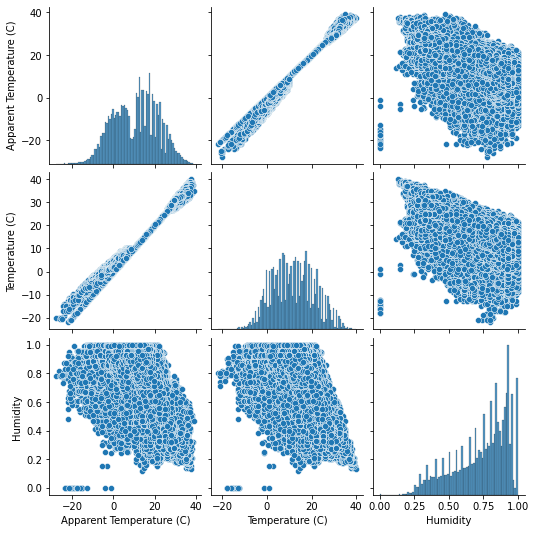

In [24]:
plt.figure(figsize=(18,8)) # this creates a figure 8 inch wide, 4 inch high
sns.pairplot(data[['Apparent Temperature (C)','Temperature (C)', 'Humidity' ]])
plt.show()

<Figure size 1296x576 with 0 Axes>

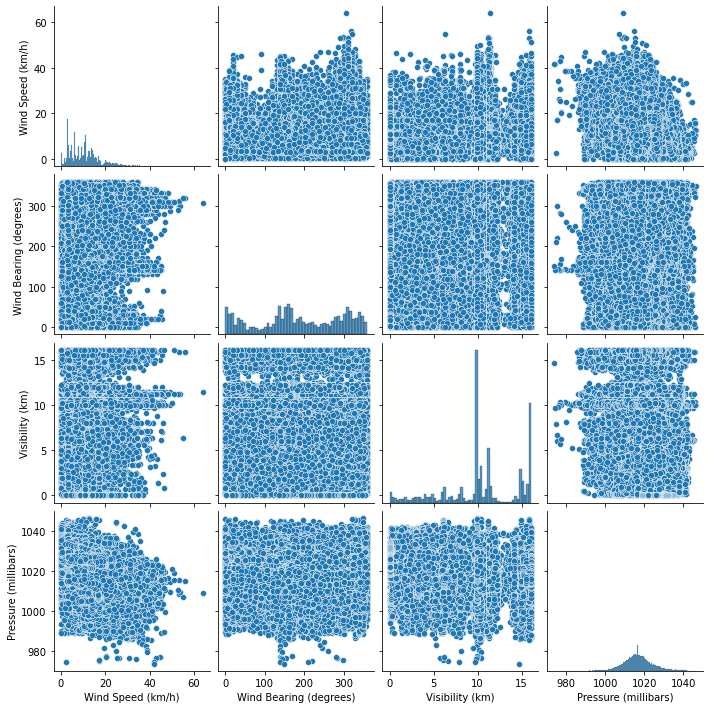

In [25]:
plt.figure(figsize=(18,8)) # this creates a figure 8 inch wide, 4 inch high
sns.pairplot(data[['Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']])
plt.show()

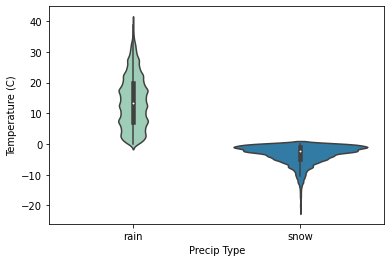

In [26]:
sns.violinplot(x="Precip Type", y="Temperature (C)", data=data, palette="YlGnBu");

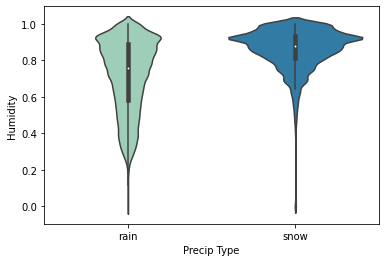

In [27]:
sns.violinplot(x="Precip Type", y="Humidity", data=data, palette="YlGnBu");

With these plots we can choose two variables to study the relationship betweem them.

In this study let's focus to explore Temperature as a function of Humidity : how humidity influences in temperature?.

***Linear Regression***

In [28]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

ls = linear_model.LinearRegression()



X = data["Humidity"].values.reshape(-1,1)
y = data["Temperature (C)"].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.33, 
                                                    shuffle=True, random_state=0)
print("Linear Regression")
ls.fit(X_train, y_train)
print("alpha = ",ls.coef_[0])
print("beta = ",ls.intercept_)
print("\n\nCalculating some regression quality metrics")
y_pred = ls.predict(X_test)
print("MSE = ",mean_squared_error(y_test, y_pred))
print("R2 = ",r2_score(y_test, y_pred))

Linear Regression
alpha =  [-30.86657506]
beta =  [34.61438171]


Calculating some regression quality metrics
MSE =  54.716241119038216
R2 =  0.40040472046870645


**Decision Tree Classifier**

first of all i'm going to change the categorical variables to numeric

In [29]:
def change_category_to_number(DailySummaryCat):
    if DailySummaryCat=='Partly cloudy throughout the day.':
        return 1
    elif DailySummaryCat=='Mostly cloudy throughout the day.':
        return 2
    elif DailySummaryCat=='Foggy in the evening.':
        return 3
    elif DailySummaryCat=='Foggy overnight and breezy in the morning.':
        return 4
    elif DailySummaryCat=='Overcast throughout the day.':
        return 5
    elif DailySummaryCat=='Partly cloudy until night.':
        return 6
    elif DailySummaryCat=='Motly cloudy until night.':
        return 7
    elif DailySummaryCat=='Foggy starting overnight continuing until morning.':
        return 8
    elif DailySummaryCat=='Foggy in the morning.':
        return 9
    elif DailySummaryCat=='Partly cloudy until evening.':
        return 10
    elif DailySummaryCat=='Partly cloudy starting in the morning.':
        return 11
    elif DailySummaryCat=='Mostly cloudy starting overnight continuing until night.':
        return 12
    elif DailySummaryCat=='Partly cloudy starting in the afternoon.':
        return 13
    elif DailySummaryCat=='Partly cloudy starting overnight.':
        return 14
    elif DailySummaryCat=='Mostly cloudy starting overnight.':
        return 15
    elif DailySummaryCat=='Mostly cloudy until night and breezy in the afternoon.':
        return 16
    elif DailySummaryCat=='Mostly cloudy until evening.':
        return 17
    elif DailySummaryCat=='Foggy throughout the day.':
        return 18
    elif DailySummaryCat=='Partly cloudy starting in the morning.':
        return 19
    elif DailySummaryCat=='Partly cloudy starting in the morning continuing until evening.':
        return 20
    elif DailySummaryCat=='Foggy until morning.':
        return 21
    elif DailySummaryCat=='Partly cloudy starting in the morning continuing until night.':
        return 22
    elif DailySummaryCat=='Mostly cloudy starting in the morning.':
        return 23
    elif DailySummaryCat=='Foggy starting in the evening.':
        return 24
    elif DailySummaryCat=='Partly cloudy starting in the afternoon continuing until evening.':
        return 25
    elif DailySummaryCat=='Foggy overnight.':
        return 26
    elif DailySummaryCat=='Clear throughout the day.':
        return 27
    elif DailySummaryCat=='Partly cloudy starting overnight continuing until night.':
        return 28
    elif DailySummaryCat=='Partly cloudy overnight.':
        return 29
    elif DailySummaryCat=='Partly cloudy starting overnight continuing until evening.':
        return 30
    elif DailySummaryCat=='Foggy until night.':
        return 31
    elif DailySummaryCat=='Partly cloudy in the morning.':
        return 32
    elif DailySummaryCat=='Foggy starting overnight continuing until afternoon.':
        return 33
    elif DailySummaryCat=='Foggy until afternoon.':
        return 34
    elif DailySummaryCat=='Breezy and mostly cloudy overnight.':
        return 35
    elif DailySummaryCat=='Partly cloudy overnight and breezy starting in the morning continuing until afternoon.':
        return 36
    elif DailySummaryCat=='Breezy in the morning and foggy in the evening.':
        return 37
    elif DailySummaryCat=='Mostly cloudy until evening and breezy in the evening.':
        return 38
    elif DailySummaryCat=='Mostly cloudy starting in the evening.':
        return 39
    elif DailySummaryCat=='Mostly cloudy throughout the day and breezy starting overnight continuing until afternoon.':
        return 40
    elif DailySummaryCat=='Breezy starting in the morning continuing until night.':
        return 41
    elif DailySummaryCat=='Overcast throughout the day and breezy starting overnight continuing until morning.':
        return 42
    elif DailySummaryCat=='Breezy starting overnight continuing until morning and foggy in the evening.':
        return 43
    elif DailySummaryCat=='Light rain until morning.':
        return 44
    elif DailySummaryCat=='Mostly cloudy until night and breezy starting in the afternoon continuing until night.':
        return 45
    elif DailySummaryCat=='Mostly cloudy starting in the morning continuing until afternoon.':
        return 46
    elif DailySummaryCat=='Breezy until afternoon and overcast throughout the day.':
        return 47
    elif DailySummaryCat=='Partly cloudy until evening and breezy in the afternoon.':
        return 48
    elif DailySummaryCat=='Breezy starting overnight continuing until morning and partly cloudy starting overnight continuing until evening.':
        return 49
    elif DailySummaryCat=='Light rain starting overnight.':
        return 50
    elif DailySummaryCat=='Partly cloudy starting overnight continuing until evening and breezy starting in the morning continuing until evening.':
        return 51
    elif DailySummaryCat=='Foggy starting in the morning continuing until evening and breezy in the evening.':
        return 52
    elif DailySummaryCat=='Partly cloudy throughout the day and breezy in the afternoon.':
        return 53
    elif DailySummaryCat=='Mostly cloudy starting overnight continuing until evening and breezy starting overnight continuing until morning.':
        return 54
    elif DailySummaryCat=='Partly cloudy starting overnight continuing until evening and breezy in the morning.':
        return 55
    elif DailySummaryCat=='Overcast throughout the day and breezy overnight.':
        return 56
    elif DailySummaryCat=='Light rain in the morning.':
        return 57
    elif DailySummaryCat=='Rain until morning.':
        return 58
    elif DailySummaryCat=='Breezy in the morning and mostly cloudy starting in the evening.':
        return 59
    elif DailySummaryCat=='Mostly cloudy starting in the morning and breezy overnight.':
        return 60
    elif DailySummaryCat=='Partly cloudy starting overnight and breezy starting in the morning continuing until afternoon.':
        return 61
    elif DailySummaryCat=='Partly cloudy starting in the morning and breezy starting in the afternoon continuing until evening.':
        return 62
    elif DailySummaryCat=='Partly cloudy starting in the morning continuing until evening and breezy in the afternoon.':
        return 63
    elif DailySummaryCat=='Foggy starting overnight continuing until morning and breezy in the afternoon.':
        return 64

In [30]:
# assign a numerical value to the categorical field of class, by using the above function
data['DailySummaryCat'] = data['Daily Summary'].apply(change_category_to_number)

In [31]:
data.fillna(method='ffill', inplace=True) 

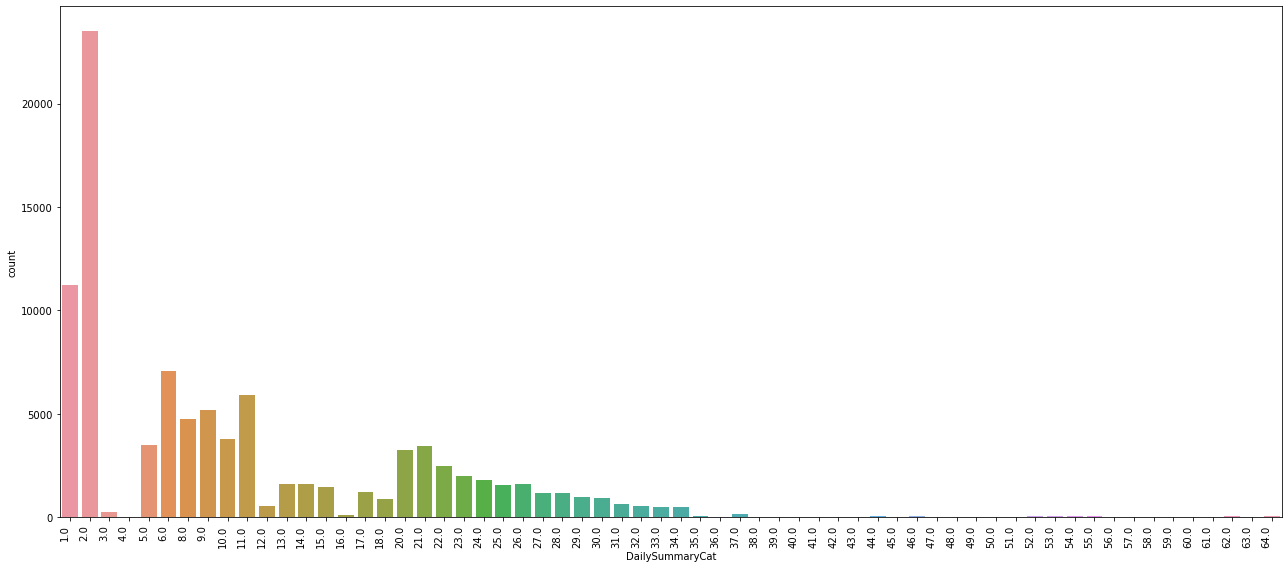

In [32]:
plt.figure(figsize=(18,8)) # this creates a figure 8 inch wide, 4 inch high
ax = sns.countplot(x=data['DailySummaryCat'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

In [33]:
def change_category(Summary):
    if Summary=='Partly Cloudy':
        return 1
    elif Summary=='Mostly Cloudy':
        return 2
    elif Summary=='Foggy':
        return 3
    elif Summary=='Clear':
        return 4
    elif Summary=='Overcast':
        return 5
    elif Summary=='Breezy and Overcast':
        return 6
    elif Summary=='Breezy and Partly Cloudy':
        return 7
    elif Summary=='Breezy and Mostly Cloudy':
        return 8
    elif Summary=='Dry and Partly Cloudy':
        return 9
    elif Summary=='Windy and Partly Cloudy':
        return 10
    elif Summary=='Light Rain':
        return 11
    elif Summary=='Breezy':
        return 12
    elif Summary=='Windy and Overcast':
        return 13
    elif Summary=='Humid and Mostly Cloudy':
        return 14
    elif Summary=='Drizzle':
        return 15
    elif Summary=='Windy and Mostly Cloudy':
        return 16
    elif Summary=='Breezy and Foggy':
        return 17
    elif Summary=='Dry':
        return 18
    elif Summary=='Humid and Partly Cloudy':
        return 19
    elif Summary=='Dry and Mostly Cloudy':
        return 20
    elif Summary=='Rain':
        return 21
    elif Summary=='Windy':
        return 22
    elif Summary=='Humid and Overcast':
        return 23
    elif Summary=='Windy and Foggy':
        return 24
    elif Summary=='Dangerously Windy and Partly Cloudy':
        return 25
    elif Summary=='Windy and Dry':
        return 26
    elif Summary=='Breezy and Dry':
        return 27
    

In [34]:
# assign a numerical value to the categorical field of class, by using the above function
data['SummaryCat'] = data['Summary'].apply(change_category)


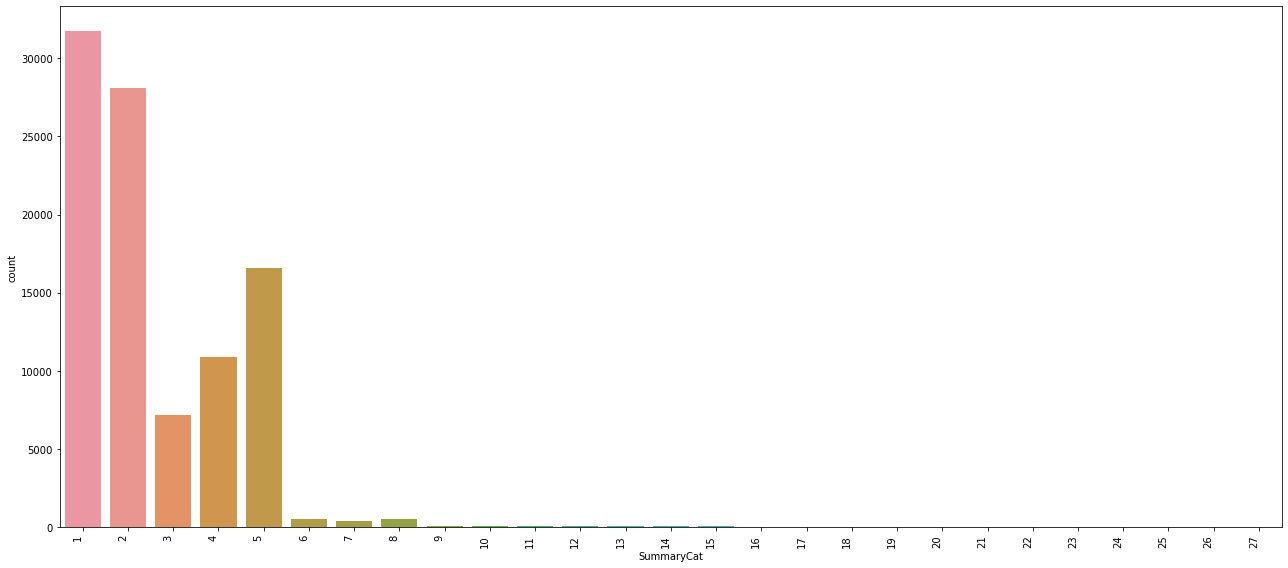

In [35]:
plt.figure(figsize=(18,8)) # this creates a figure 8 inch wide, 4 inch high
ax = sns.countplot(x=data['SummaryCat'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

In [36]:
def change_category(PrecipTypeCat):
    if PrecipTypeCat=='rain':
        return 1
    elif PrecipTypeCat=='snow':
        return 2
  

In [37]:
# assign a numerical value to the categorical field of class, by using the above function
data['PrecipTypeCat'] = data['Precip Type'].apply(change_category)

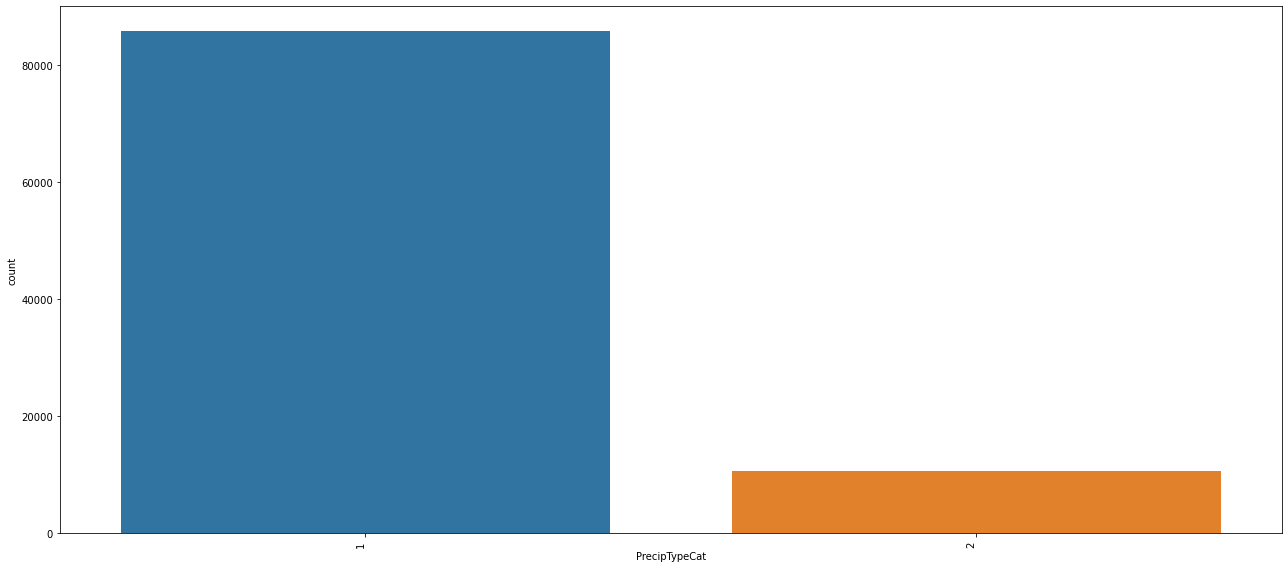

In [38]:
plt.figure(figsize=(18,8)) # this creates a figure 8 inch wide, 4 inch high
ax = sns.countplot(x=data['PrecipTypeCat'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

In [39]:
data.drop(['Formatted Date','Summary','Daily Summary','Precip Type','Date'],axis=1,inplace=True)
data.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),DailySummaryCat,SummaryCat,PrecipTypeCat
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,1.0,1,1
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,1.0,1,1
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,1.0,2,1
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,1.0,1,1
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,1.0,2,1


In [40]:
X = data.drop('DailySummaryCat', axis=1)
y = data['DailySummaryCat']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=128)

In [43]:
from sklearn.tree import DecisionTreeClassifier
dtClassifer = DecisionTreeClassifier(max_leaf_nodes=15,random_state=0)

In [44]:
dtClassifer.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=15, random_state=0)

In [45]:
prediction = dtClassifer.predict(X_test)

In [46]:
prediction[:100]

array([ 6.,  1.,  2.,  2.,  6.,  2.,  6.,  6.,  2.,  2.,  2.,  1.,  6.,
        2.,  6.,  2.,  6.,  2.,  2., 20.,  2.,  2.,  2.,  1.,  2.,  1.,
        2., 20.,  2.,  1.,  8.,  2.,  2.,  2.,  6.,  1.,  6.,  6.,  1.,
        1.,  2.,  8.,  2.,  1.,  2.,  1.,  1., 20.,  6.,  2.,  2.,  2.,
        2.,  1.,  2.,  6.,  8.,  8.,  1.,  2.,  6.,  2.,  2.,  2.,  6.,
        2.,  1.,  8.,  6.,  1.,  2.,  2.,  2., 20.,  2.,  2.,  2.,  2.,
        1.,  6.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  6., 20.,  2.,
        1.,  2.,  2.,  2.,  2.,  2., 20.,  2., 18.])

In [47]:
y_test[:100]

65391    22.0
95001     6.0
69642     1.0
69570     2.0
4310     20.0
         ... 
16840     6.0
78281     2.0
75344    27.0
14366     2.0
56071    21.0
Name: DailySummaryCat, Length: 100, dtype: float64

In [49]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_true=y_test, y_pred=prediction)

0.29523776610450647

**Logistic Regression**

In [51]:
from sklearn.linear_model import LogisticRegression
lrClassifier = LogisticRegression()

In [52]:
lrClassifier.fit(X_train,y_train)

C:\Users\sa\anaconda3\ANAKONDA\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
prediction = lrClassifier.predict(X_test)

In [54]:
prediction[:3000]

array([1., 1., 2., ..., 1., 2., 1.])

In [55]:
y_test[:100]

65391    22.0
95001     6.0
69642     1.0
69570     2.0
4310     20.0
         ... 
16840     6.0
78281     2.0
75344    27.0
14366     2.0
56071    21.0
Name: DailySummaryCat, Length: 100, dtype: float64

In [57]:
accuracy_score(y_true=y_test, y_pred=prediction)

0.25542576721039534